In [1]:
import SigVarGen as svg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(775, 855)


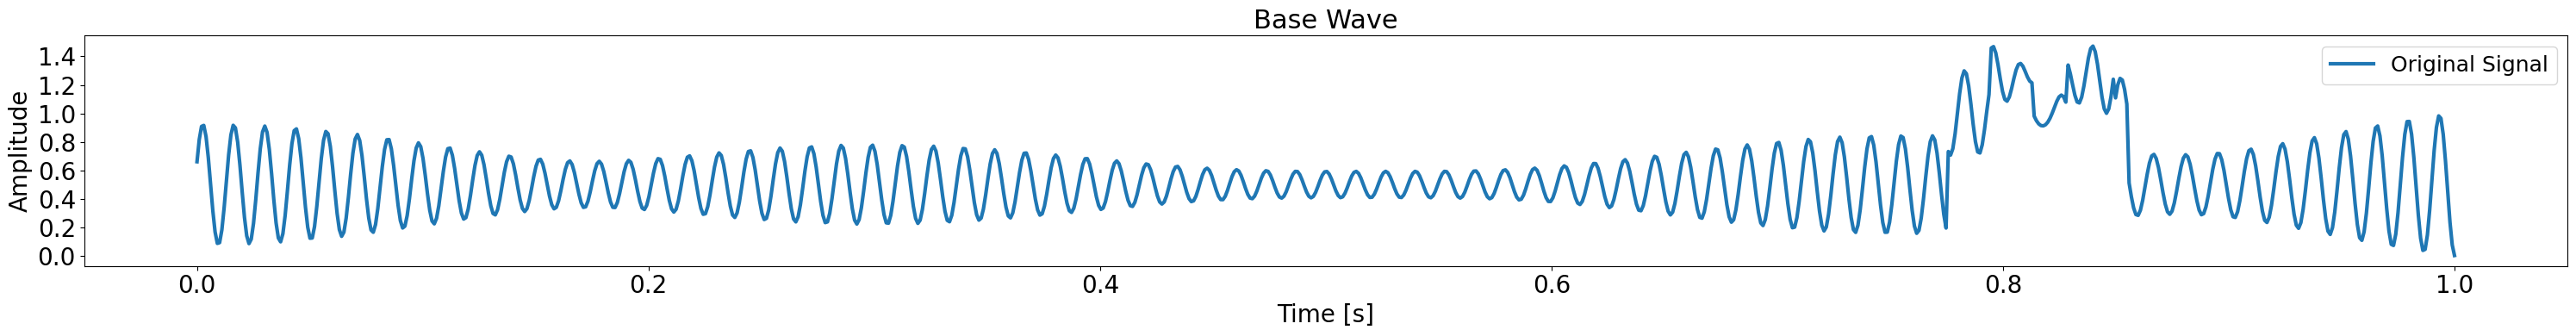

In [60]:
t = np.linspace(0, 1, 1000)
signal_range = {'test': {
        'amplitude': (0, 1),  # V
        'frequency': (70, 75)  # Hz
    }}
interrupt_range = {'test': {
        'amplitude': (1, 2),  # V
        'frequency': (75, 95)  # Hz
    }}
wave, _ = svg.generate_signal(t=t, n_sinusoids=10, amplitude_range=(0,1), frequency_range=(70,75))
wave, interrupt_params = svg.add_interrupt_with_params(t, wave.copy(), 'test', signal_range, interrupt_range, 
                                            0, duration_ratio=0.08, disperse=False, drop=False, complex_iter=2, shrink_complex=True)

plt.figure(figsize=(30, 4))
plt.plot(t, wave, label="Original Signal", linewidth=3)
plt.title(f"Base Wave", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Time [s]", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.legend(fontsize=18)
plt.tight_layout()
plt.show()

Apply a random time shift to the signal.

This function shifts the waveform by a random number of samples within the range [-max_shift, max_shift].

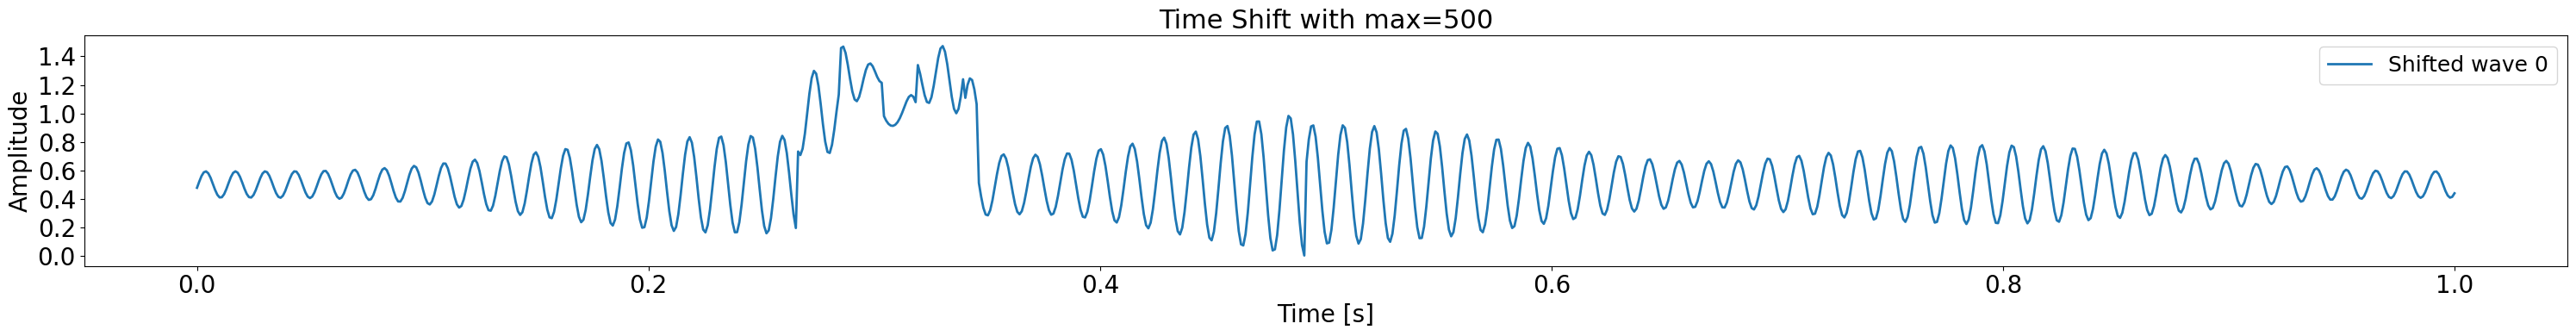

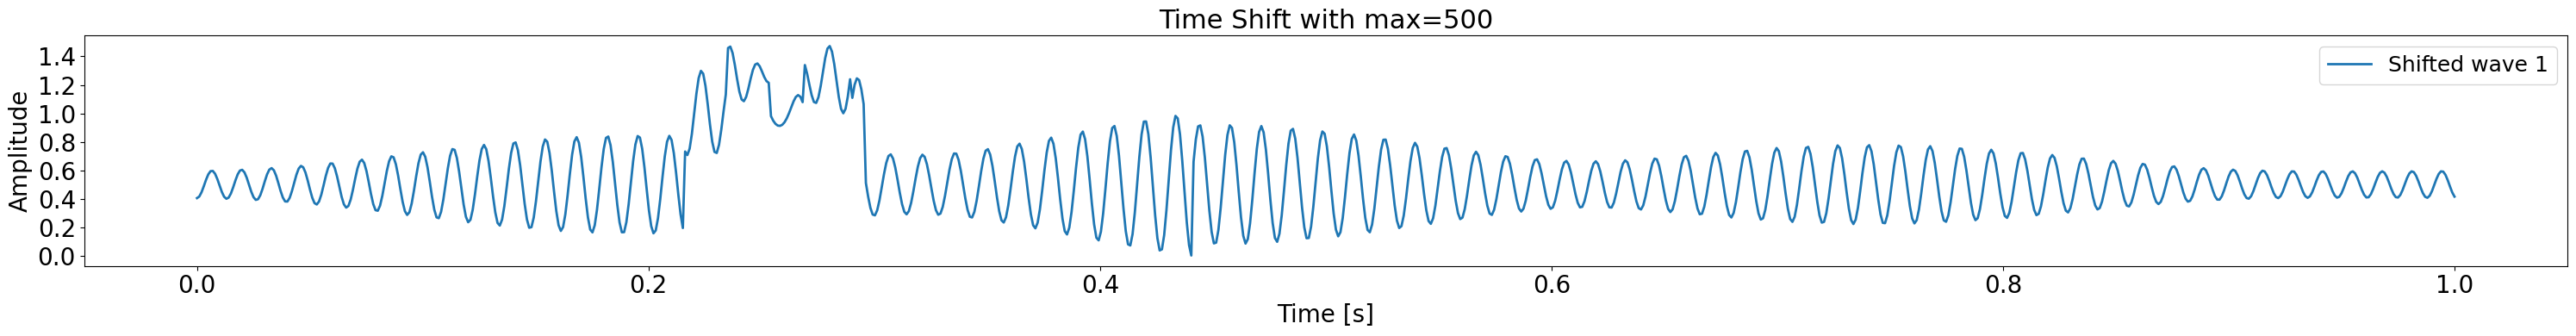

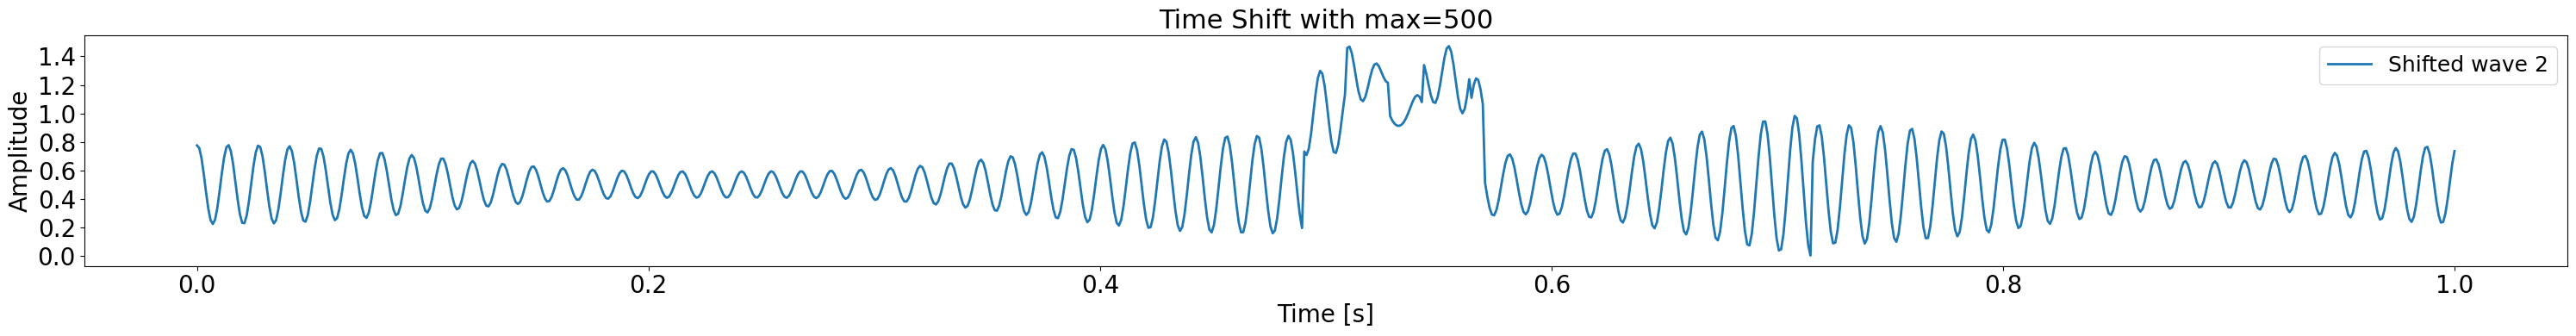

In [61]:
for i in range(3):
    plt.figure(figsize=(30, 4))
    #plt.plot(t, wave, label="Original Signal", linewidth=3)
    shifted_wave = svg.apply_time_shift(wave, max_shift=500)
    plt.plot(t, shifted_wave, label=f"Shifted wave {i}", alpha=1, linewidth=2)
    plt.title(f"Time Shift with max=500", fontsize=22)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("Time [s]", fontsize=20)
    plt.ylabel("Amplitude", fontsize=20)
    plt.legend(fontsize=18)
    plt.tight_layout()
    plt.show()

Apply time warping to the signal by modifying the time scale.

The function compresses or expands the time axis and fills any missing parts by generating a new signal segment.

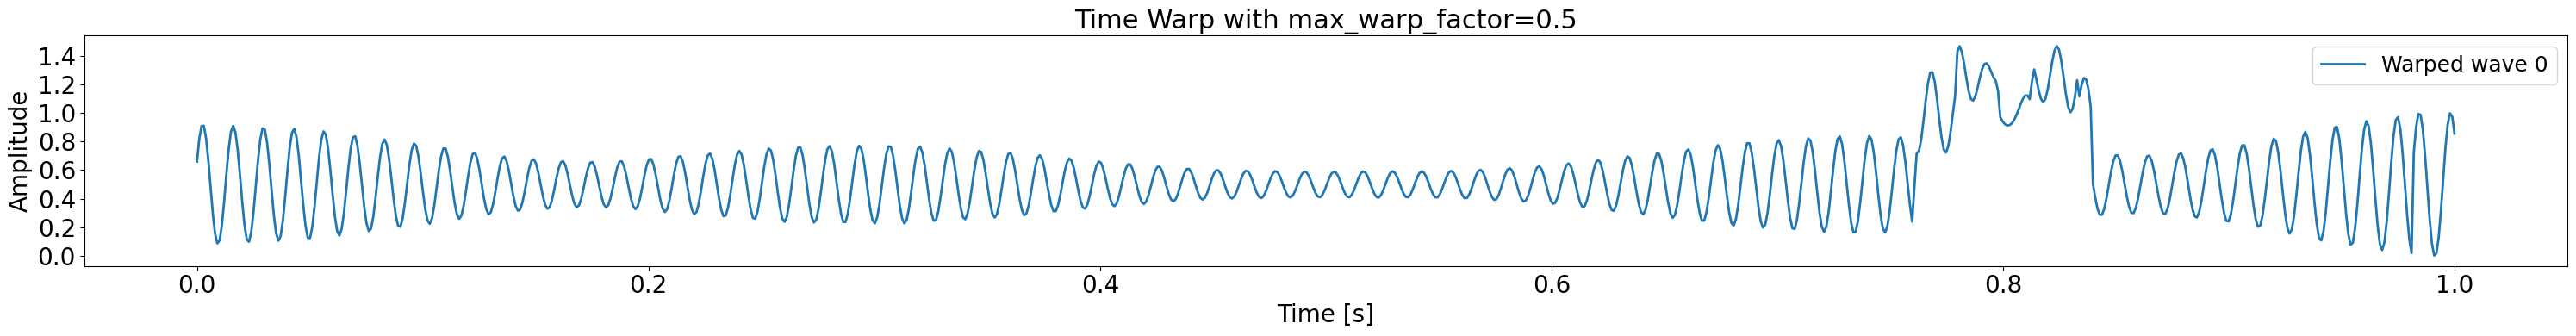

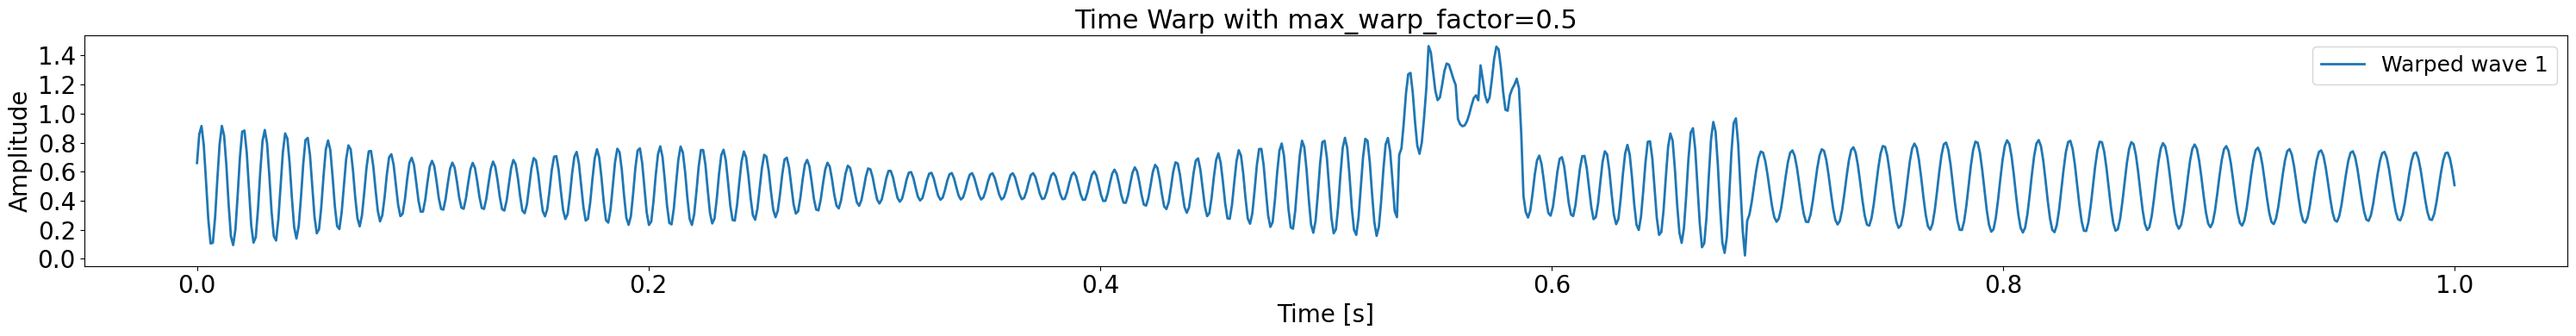

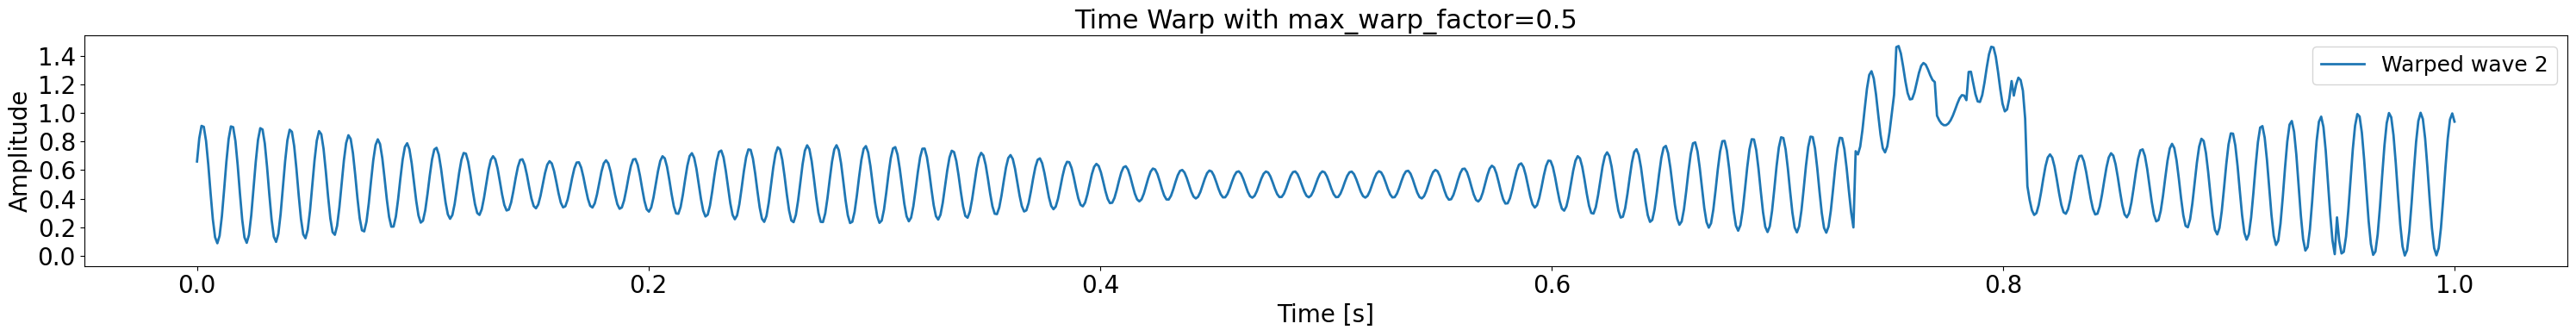

In [62]:
for i in range(3):
    plt.figure(figsize=(30, 4))
    #plt.plot(t, wave, label="Original Signal", linewidth=3)
    shifted_wave = svg.apply_time_warp(wave, 0.5, t, n_sinusoids=10, amplitude_range=(0,1), base_frequency_range=(70, 75))
    plt.plot(t, shifted_wave, label=f"Warped wave {i}", alpha=1, linewidth=2)
    plt.title(f"Time Warp with max_warp_factor=0.5", fontsize=22)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("Time [s]", fontsize=20)
    plt.ylabel("Amplitude", fontsize=20)
    plt.legend(fontsize=18)
    plt.tight_layout()
    plt.show()

Apply random gain variation to the signal.

The function multiplies the waveform by a randomly chosen gain factor.

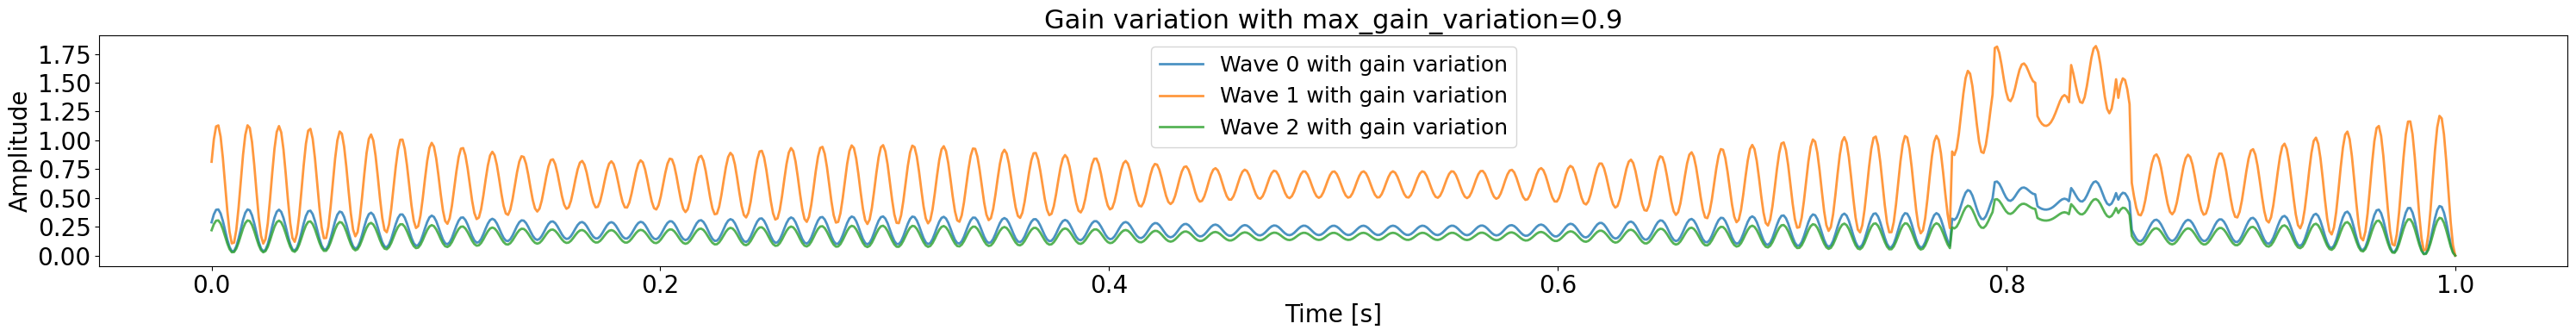

In [63]:
plt.figure(figsize=(30, 4))
#plt.plot(t, wave, label="Original Signal", linewidth=3)
for i in range(3):
    shifted_wave = svg.apply_gain_variation(wave, max_gain_variation=0.9)
    plt.plot(t, shifted_wave, label=f"Wave {i} with gain variation", alpha=0.8, linewidth=2)
plt.title(f"Gain variation with max_gain_variation=0.9", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Time [s]", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.legend(fontsize=18)
plt.tight_layout()
plt.show()

Apply amplitude modulation to the entire signal.

The function scales the waveform’s amplitude dynamically using a sinusoidal modulator.

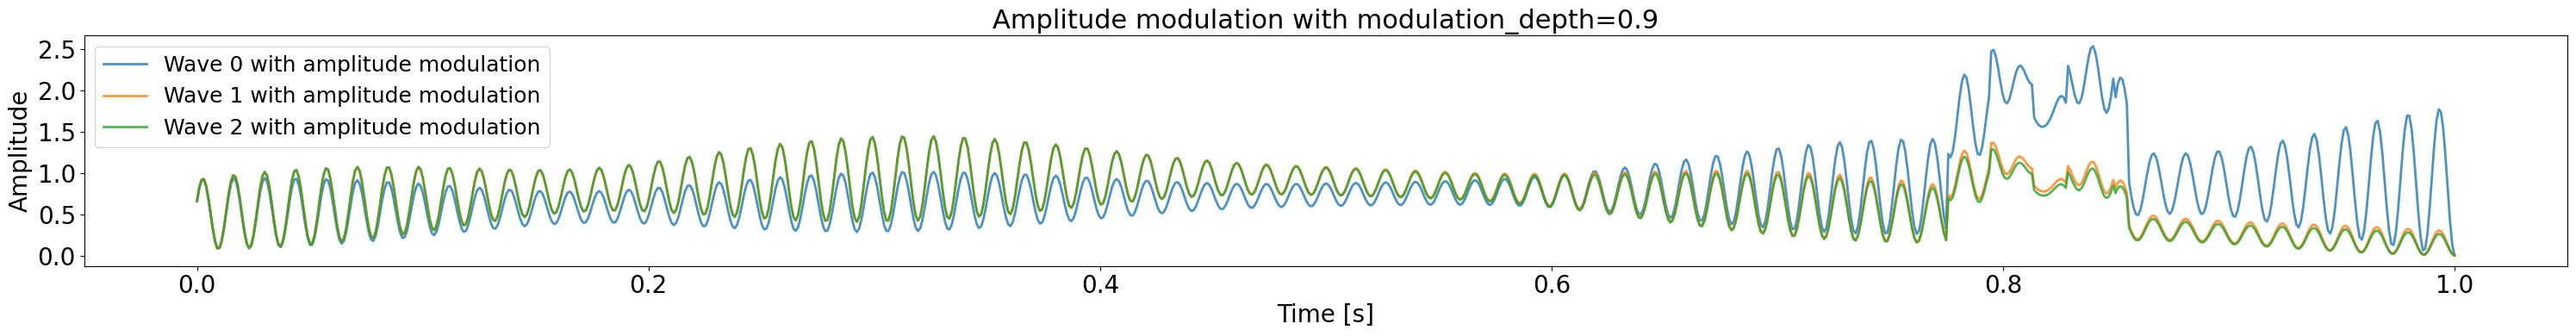

In [64]:
plt.figure(figsize=(30, 4))
#plt.plot(t, wave, label="Original Signal", linewidth=3)
for i in range(3):
    shifted_wave = svg.apply_amplitude_modulation(wave, 0.9)
    plt.plot(t, shifted_wave, label=f"Wave {i} with amplitude modulation", alpha=0.8, linewidth=2)
plt.title(f"Amplitude modulation with modulation_depth=0.9", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Time [s]", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.legend(fontsize=18)
plt.tight_layout()
plt.show()

Apply amplitude modulation to a specific region of the waveform.

The function alters the amplitude of the signal within a defined time range using sinusoidal modulation.

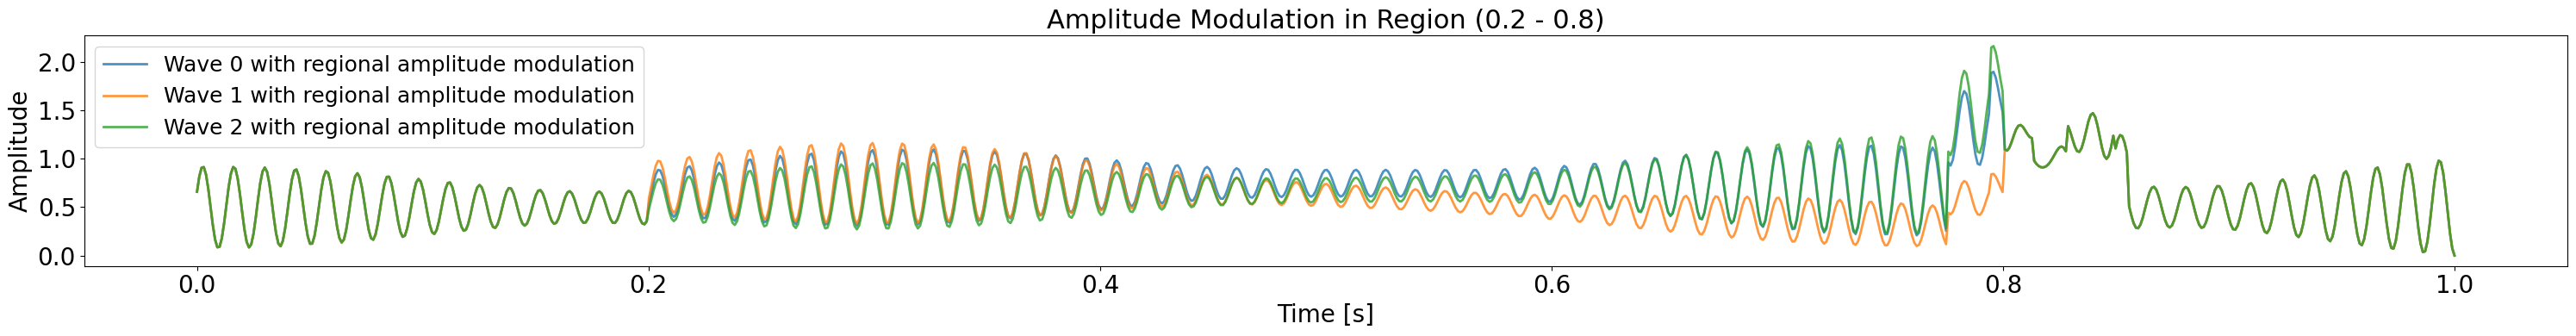

In [66]:
plt.figure(figsize=(30, 4))
for i in range(3):
    modulated_wave = svg.apply_amplitude_modulation_region(wave, modulation_depth=0.5, f_min=0.2, f_max=0.8)
    plt.plot(t, modulated_wave, label=f"Wave {i} with regional amplitude modulation", alpha=0.8, linewidth=2)
plt.title(f"Amplitude Modulation in Region (0.2 - 0.8)", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Time [s]", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.legend(fontsize=18)
plt.tight_layout()
plt.show()

Apply baseline drift by adding a slow linear variation to the signal.

The function gradually increases or decreases the waveform’s baseline over time.

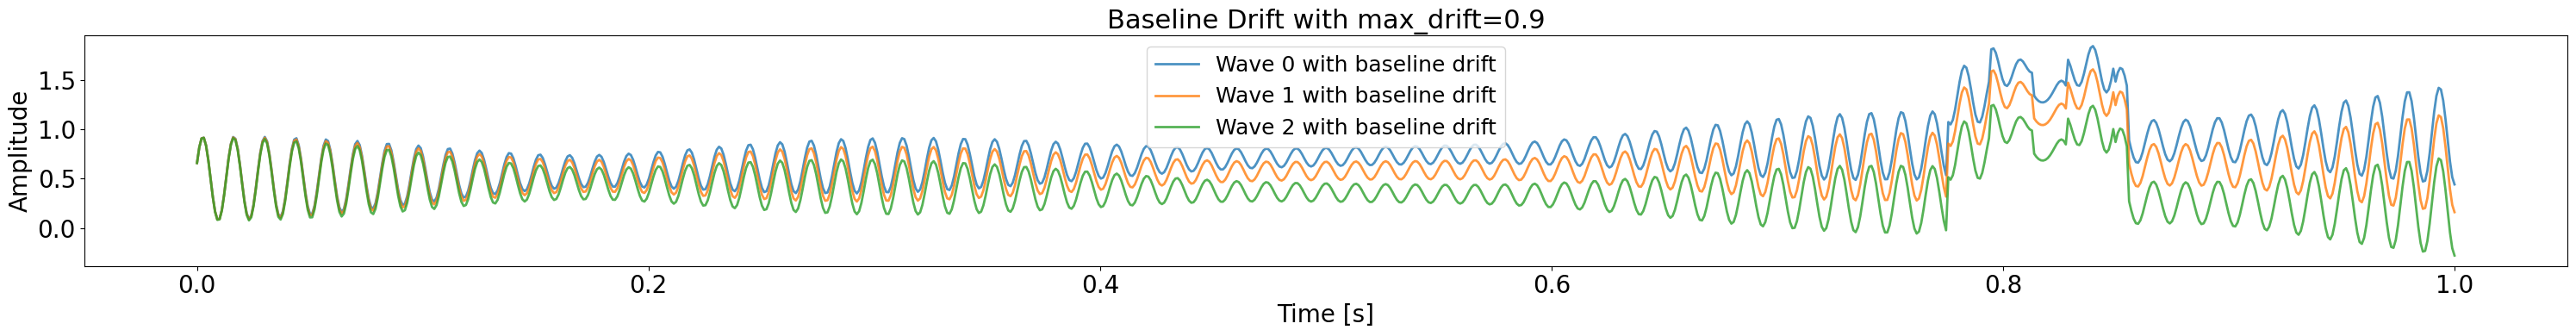

In [65]:
plt.figure(figsize=(30, 4))
for i in range(3):
    drifted_wave = svg.apply_baseline_drift(wave, 0.9, reversed=False)
    plt.plot(t, drifted_wave, label=f"Wave {i} with baseline drift", alpha=0.8, linewidth=2)
plt.title(f"Baseline Drift with max_drift=0.9", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Time [s]", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.legend(fontsize=18)
plt.tight_layout()
plt.show()

Apply baseline drift to a specific section of the waveform.

The function introduces a gradual shift in amplitude between selected start and end points.

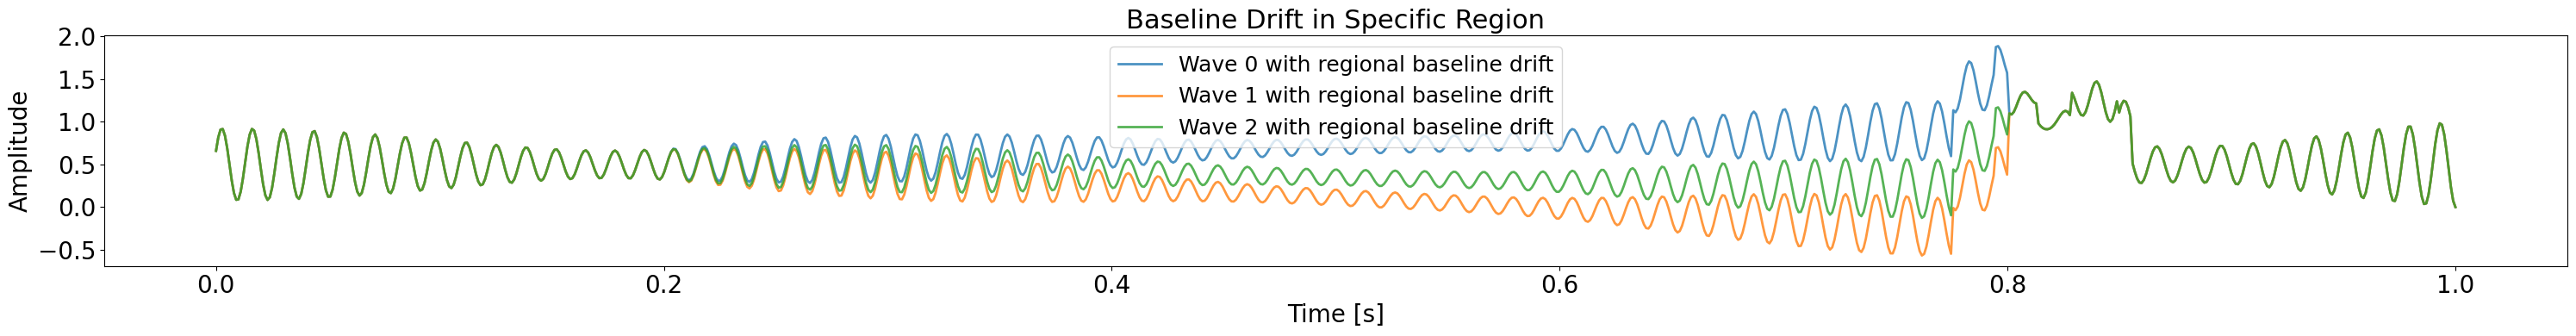

In [72]:
plt.figure(figsize=(30, 4))
for i in range(3):
    drifted_wave = svg.apply_baseline_drift_region(wave, max_drift=0.9, start_frac=0.2, end_frac=0.8)
    plt.plot(t, drifted_wave, label=f"Wave {i} with regional baseline drift", alpha=0.8, linewidth=2)
plt.title("Baseline Drift in Specific Region", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Time [s]", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.legend(fontsize=18)
plt.tight_layout()
plt.show()

Apply a piecewise linear drift to the waveform.

The function divides the signal into segments and assigns each a different drift value for a stepwise effect.

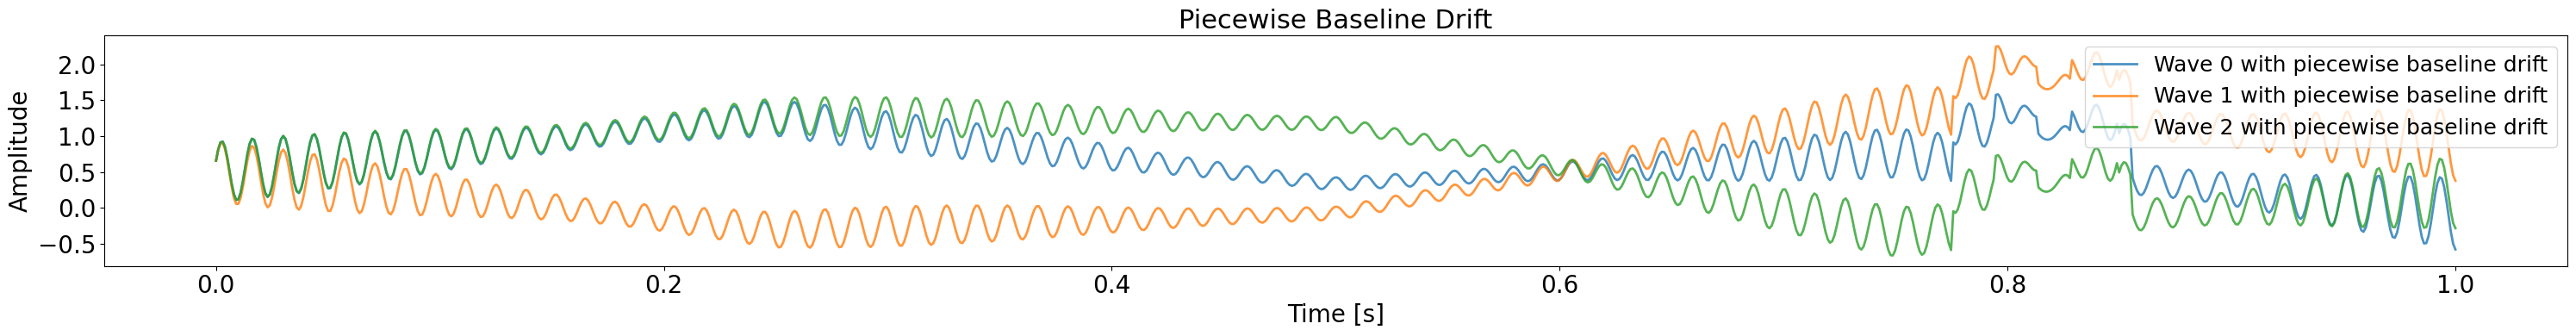

In [80]:
plt.figure(figsize=(30, 4))
for i in range(3):
    drifted_wave = svg.apply_baseline_drift_piecewise(wave, max_drift=0.9, reversed=False, num_pieces=4)
    plt.plot(t, drifted_wave, label=f"Wave {i} with piecewise baseline drift", alpha=0.8, linewidth=2)
plt.title("Piecewise Baseline Drift", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Time [s]", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.legend(fontsize=18)
plt.tight_layout()
plt.show()

Apply quadratic baseline drift to the waveform.

The function shapes the drift using a squared function, producing a smooth curvature effect over time.

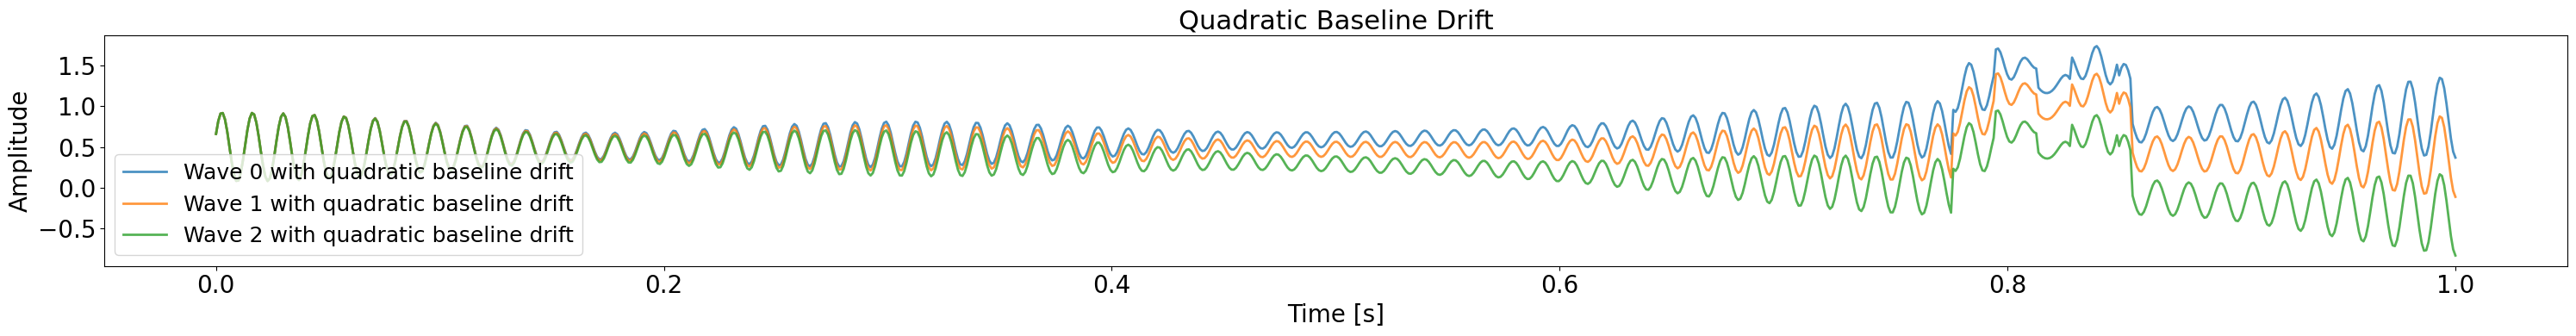

In [85]:
plt.figure(figsize=(30, 4))
for i in range(3):
    drifted_wave = svg.apply_baseline_drift_quadratic(wave, max_drift=0.9, reversed=False)
    plt.plot(t, drifted_wave, label=f"Wave {i} with quadratic baseline drift", alpha=0.8, linewidth=2)
plt.title("Quadratic Baseline Drift", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Time [s]", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.legend(fontsize=18)
plt.tight_layout()
plt.show()

Apply a drift that peaks in the middle of the waveform.

The function creates a parabolic drift centered in the middle while keeping the start and end unchanged.

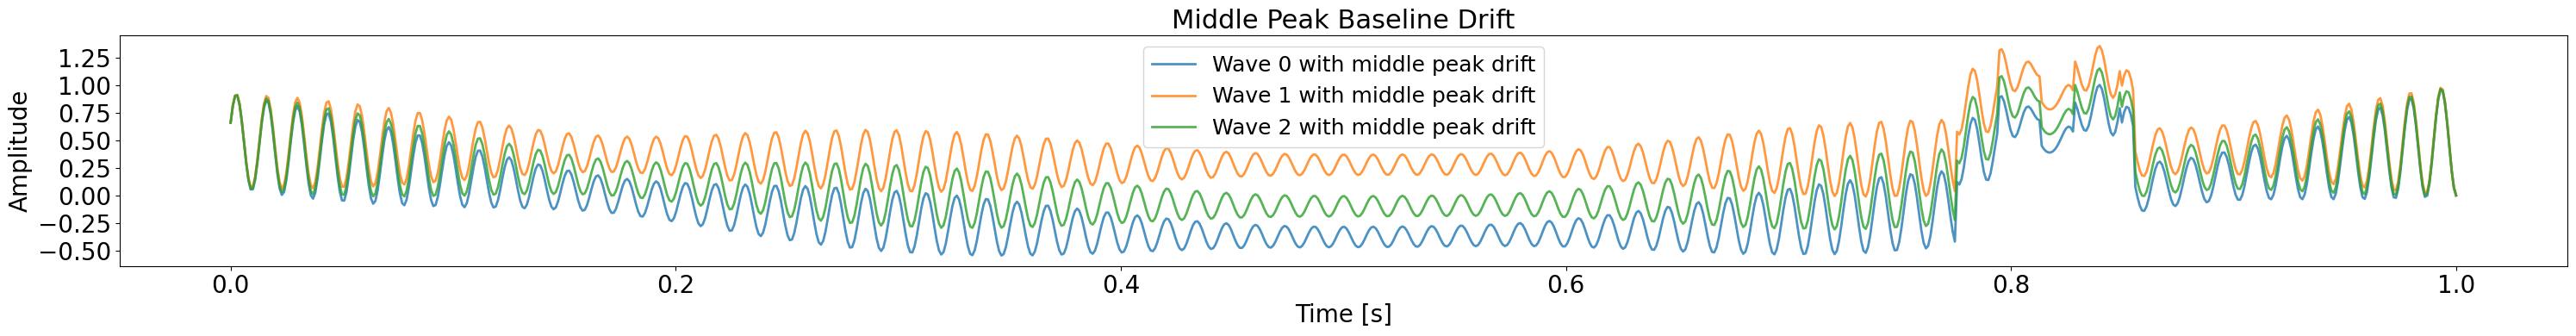

In [87]:
plt.figure(figsize=(30, 4))
for i in range(3):
    drifted_wave = svg.apply_baseline_drift_middle_peak(wave, max_drift=0.9, direction='down')
    plt.plot(t, drifted_wave, label=f"Wave {i} with middle peak drift", alpha=0.8, linewidth=2)
plt.title("Middle Peak Baseline Drift", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Time [s]", fontsize=20)
plt.ylabel("Amplitude", fontsize=20)
plt.legend(fontsize=18)
plt.tight_layout()
plt.show()

Apply nonlinear distortion by passing the waveform through a tanh function.

The function limits extreme amplitudes and compresses signal peaks.

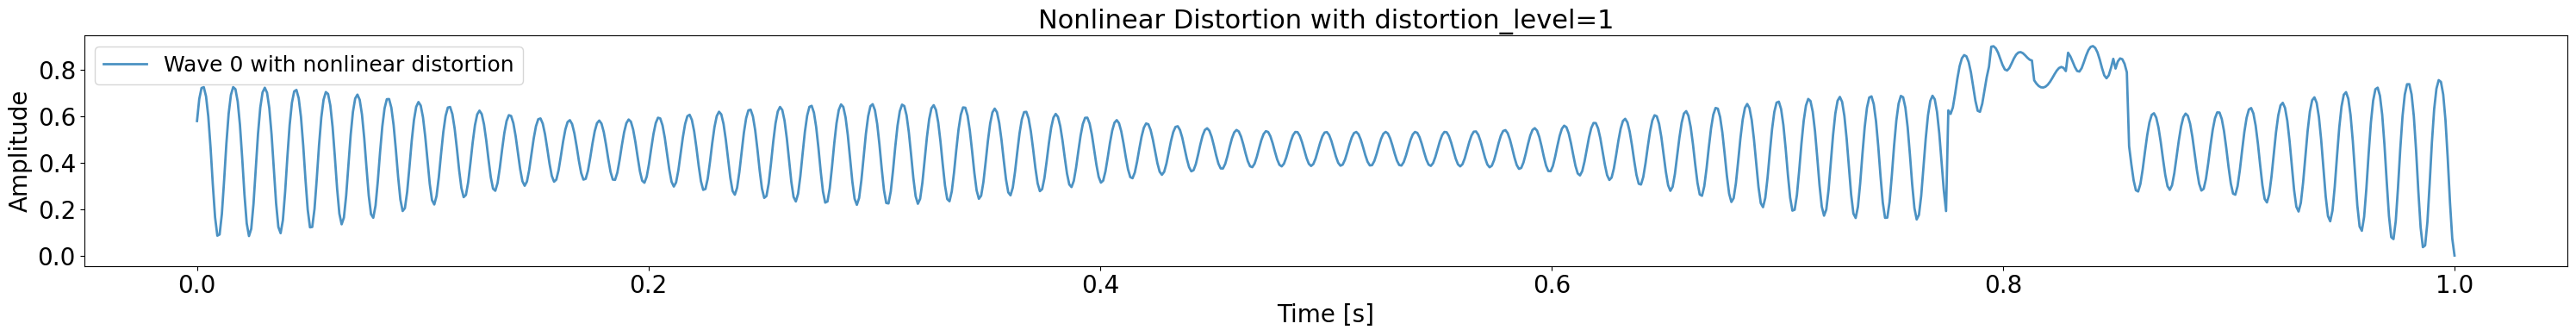

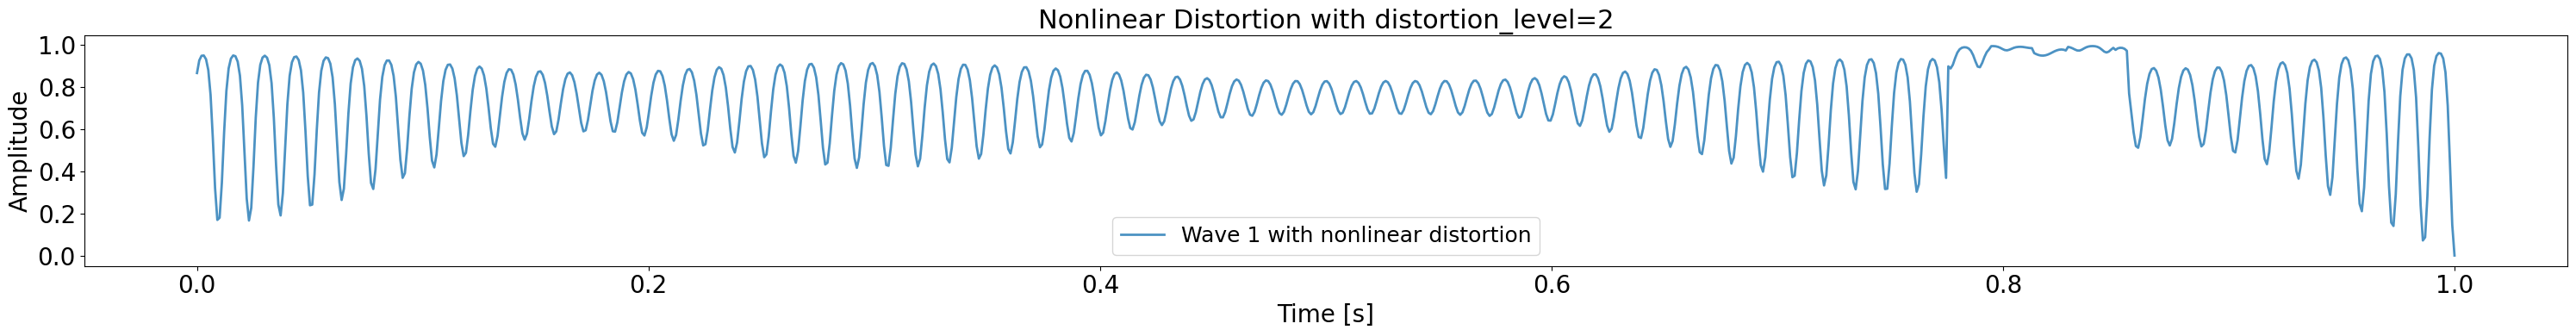

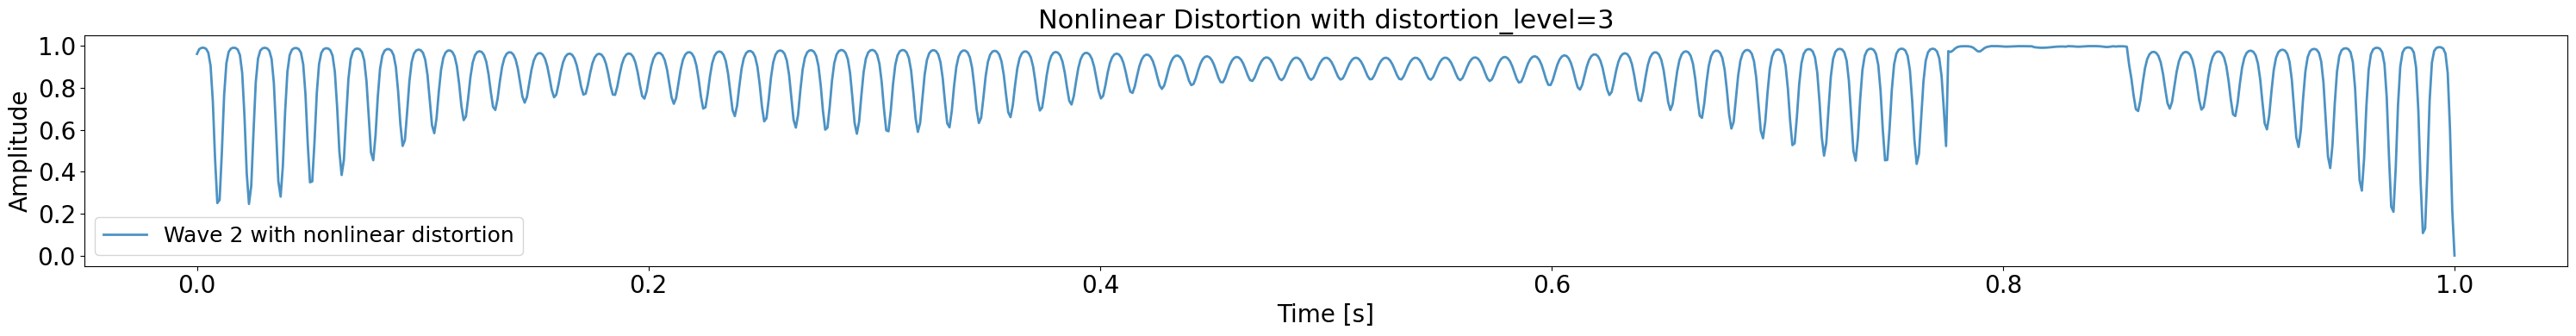

In [67]:
for i in range(3):
    plt.figure(figsize=(30, 4))
    distorted_wave = svg.apply_nonlinear_distortion(wave, distortion_level=i+1)
    plt.plot(t, distorted_wave, label=f"Wave {i} with nonlinear distortion", alpha=0.8, linewidth=2)
    plt.title(f"Nonlinear Distortion with distortion_level={i+1}", fontsize=22)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("Time [s]", fontsize=20)
    plt.ylabel("Amplitude", fontsize=20)
    plt.legend(fontsize=18)
    plt.tight_layout()
    plt.show()

Apply quantization noise by reducing signal resolution to a limited number of bits.

The function rounds the waveform to a finite set of amplitude levels.

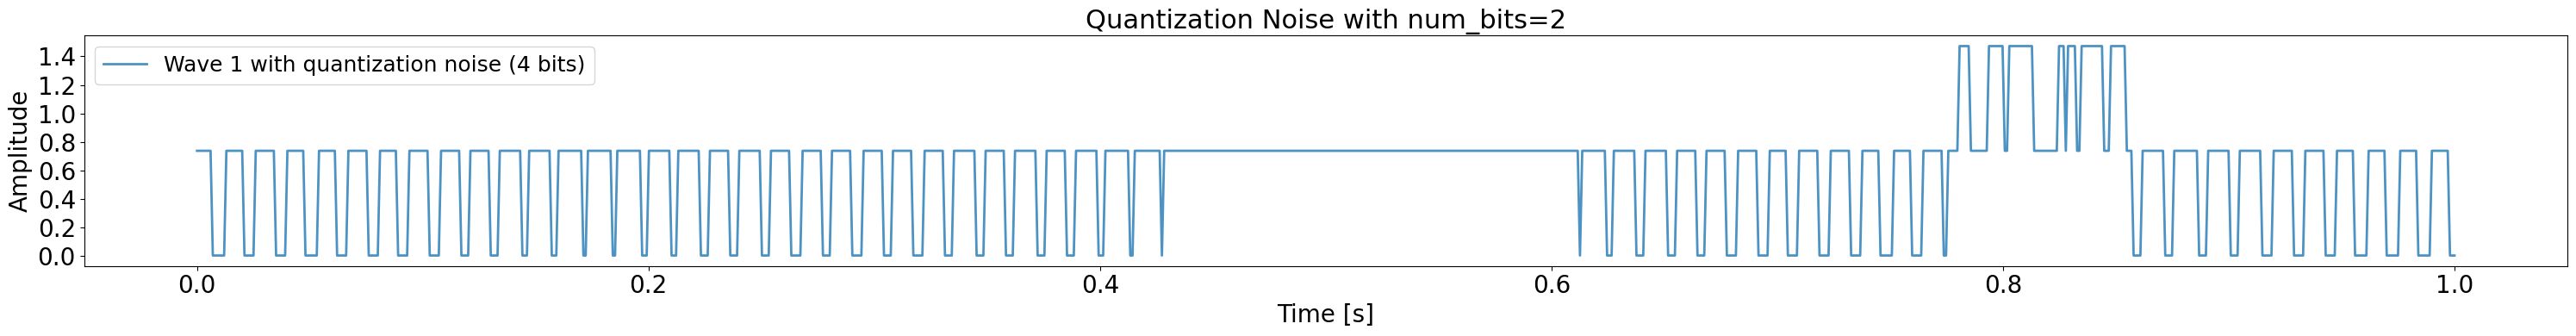

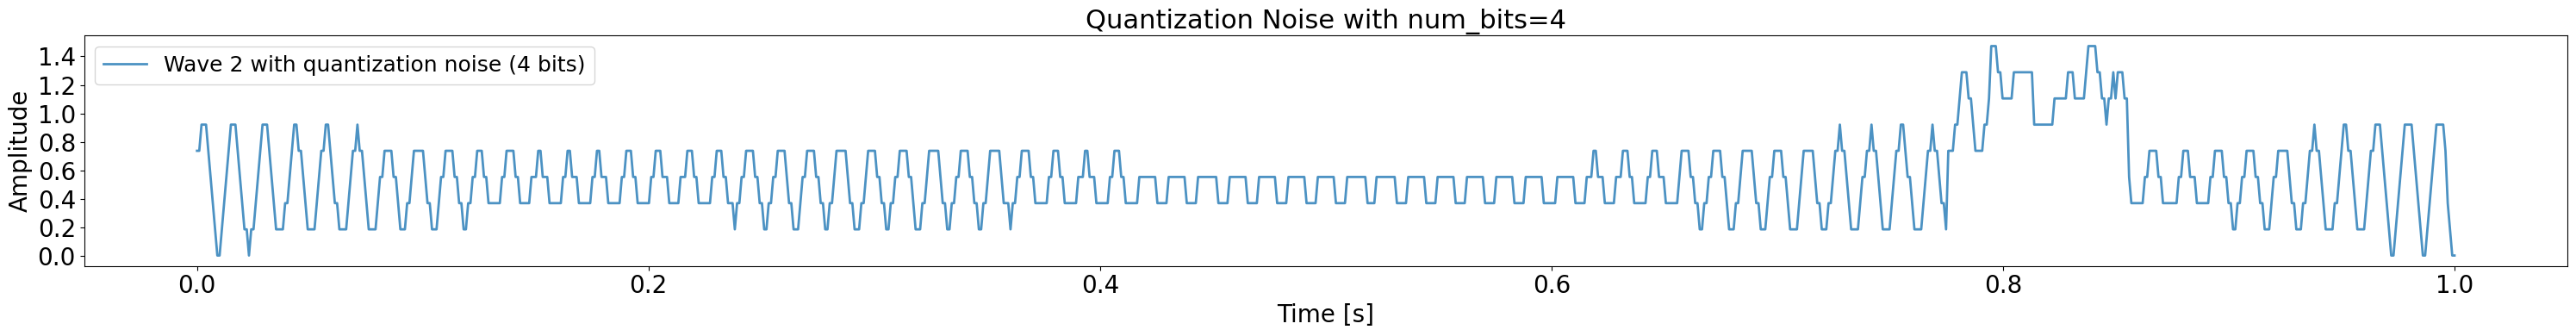

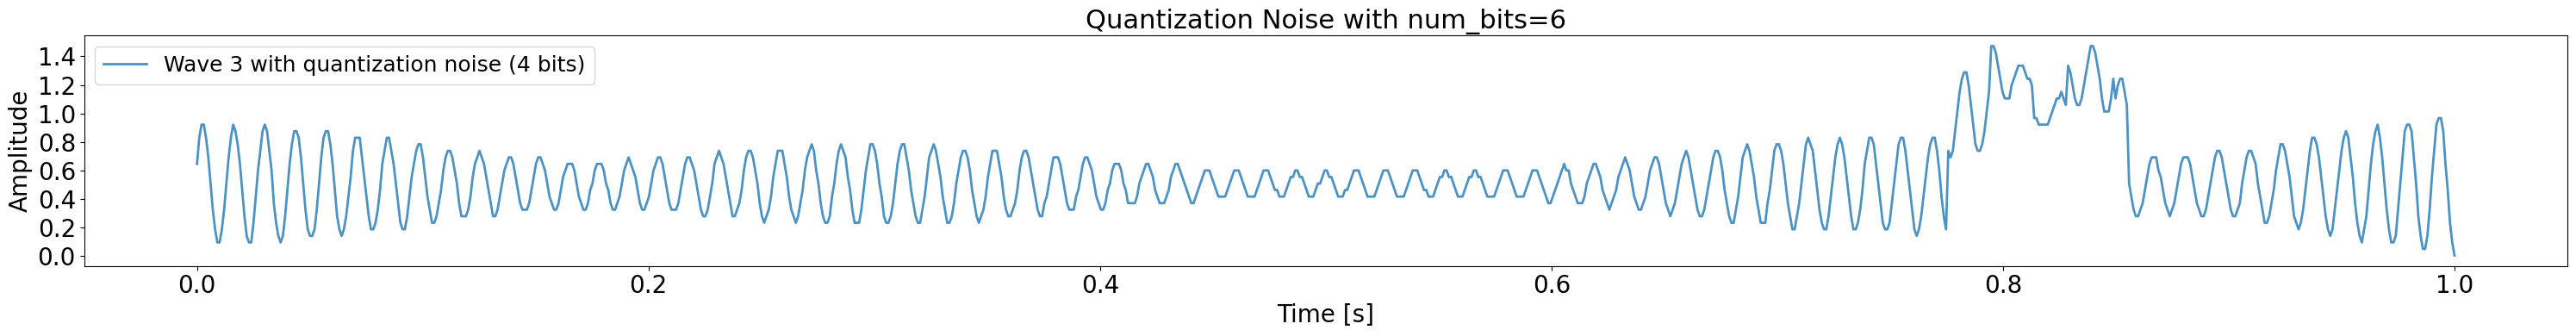

In [68]:
for i in range(1,4):
    plt.figure(figsize=(30, 4))
    quantized_wave = svg.apply_quantization_noise(wave, num_bits=i*2)
    plt.plot(t, quantized_wave, label=f"Wave {i} with quantization noise (4 bits)", alpha=0.8, linewidth=2)
    plt.title(f"Quantization Noise with num_bits={i*2}", fontsize=22)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("Time [s]", fontsize=20)
    plt.ylabel("Amplitude", fontsize=20)
    plt.legend(fontsize=18)
    plt.tight_layout()
    plt.show()

Transform the wave based on a given score by replacing segments with a generated signal.

The function selects portions of the waveform with score probability and substitutes them with a generated signal.

Interrupt parts remain unchanged.

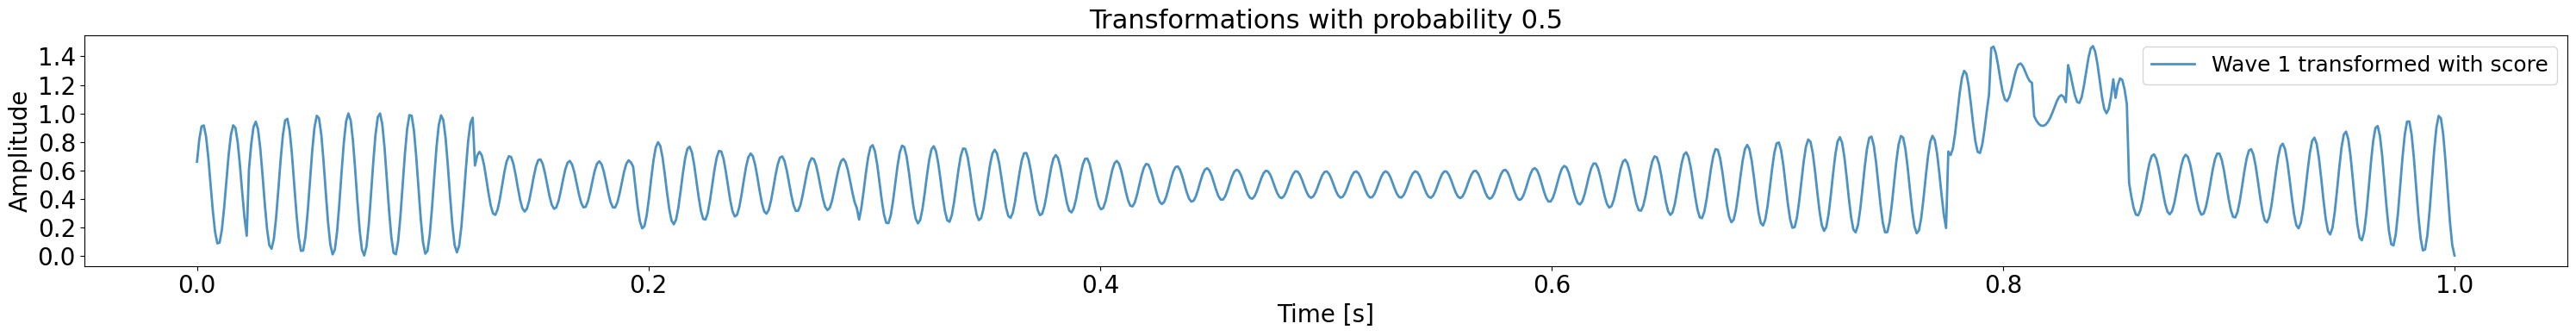

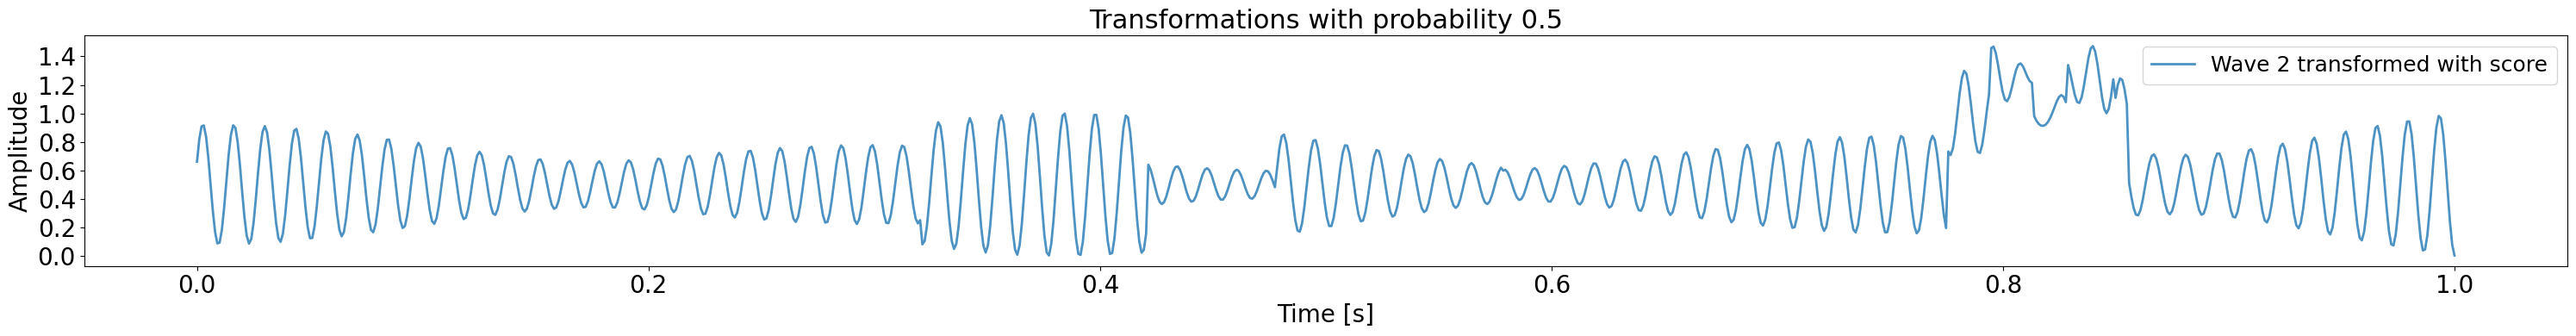

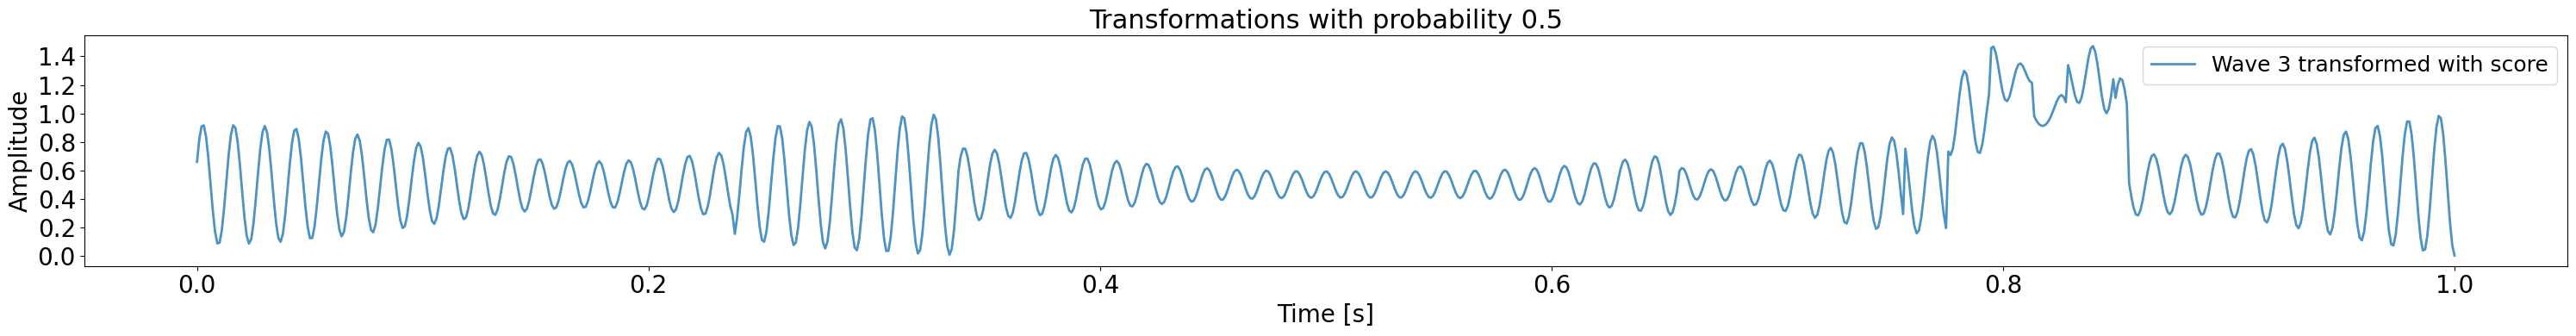

In [70]:
for i in range(1,4):
    plt.figure(figsize=(30, 4))
    quantized_wave = svg.transform_wave_with_score(wave, 0.5, t, n_sinusoids=10, amplitude_range=(0,1), base_frequency_range=(70, 75), interrupt_params=interrupt_params)
    plt.plot(t, quantized_wave, label=f"Wave {i} transformed with score", alpha=0.8, linewidth=2)
    plt.title(f"Transformations with probability 0.5", fontsize=22)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("Time [s]", fontsize=20)
    plt.ylabel("Amplitude", fontsize=20)
    plt.legend(fontsize=18)
    plt.tight_layout()
    plt.show()